In [1]:
import pandas as pd 
from functools import reduce

In [2]:
%matplotlib inline

In [3]:
data_df = pd.read_json("../1-Data/train.json")

# EDA 

## Number of restaurants

In [8]:
len(data_df)

39774

##  Number of cuisine types

In [9]:
data_df.cuisine.value_counts().count()

20

In [10]:
data_df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

* Conclusion:  
1- Classification problem is hard with 20 labels   
2- Uneven distribution data labels 
 

##  Number of Ingredients per cuisine

In [11]:
data_df.ingredients

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
5        [plain flour, sugar, butter, eggs, fresh ginge...
6        [olive oil, salt, medium shrimp, pepper, garli...
7        [sugar, pistachio nuts, white almond bark, flo...
8        [olive oil, purple onion, fresh pineapple, por...
9        [chopped tomatoes, fresh basil, garlic, extra-...
10       [pimentos, sweet pepper, dried oregano, olive ...
11       [low sodium soy sauce, fresh ginger, dry musta...
12       [Italian parsley leaves, walnuts, hot red pepp...
13       [ground cinnamon, fresh cilantro, chili powder...
14       [fresh parmesan cheese, butter, all-purpose fl...
15       [tumeric, vegetable stock, tomatoes, garam mas...
16       [greek yogurt, lemon curd, confectioners sugar.

In [12]:
def flatten(ingr):
    return reduce(lambda x,y : x+y, ingr) 

In [13]:
cuisine_ingr =  data_df.groupby('cuisine').apply(lambda x: flatten(x["ingredients"])).reset_index(name='ingredients')

## Ingredients

In [14]:
cuisine_ingr['ingredients']

0     [ice cubes, club soda, white rum, lime, turbin...
1     [greek yogurt, lemon curd, confectioners sugar...
2     [herbs, lemon juice, fresh tomatoes, paprika, ...
3     [low sodium soy sauce, fresh ginger, dry musta...
4     [eggs, pepper, salt, mayonaise, cooking oil, g...
5     [sugar, salt, fennel bulb, water, lemon olive ...
6     [romaine lettuce, black olives, grape tomatoes...
7     [water, vegetable oil, wheat, salt, black pepp...
8     [cooking spray, salt, black pepper, yukon gold...
9     [sugar, pistachio nuts, white almond bark, flo...
10    [plain flour, sugar, butter, eggs, fresh ginge...
11    [sirloin, mirin, yellow onion, low sodium soy ...
12    [jasmine rice, garlic, scallions, sugar, shiit...
13    [olive oil, purple onion, fresh pineapple, por...
14    [ground cloves, whole nutmegs, ground ginger, ...
15    [water, grits, mozzarella cheese, salt, water,...
16    [plain flour, ground pepper, salt, tomatoes, g...
17    [olive oil, salt, medium shrimp, pepper, g

In [15]:
ingredients = flatten(list(cuisine_ingr['ingredients'].values))

### Most occuring ingredients

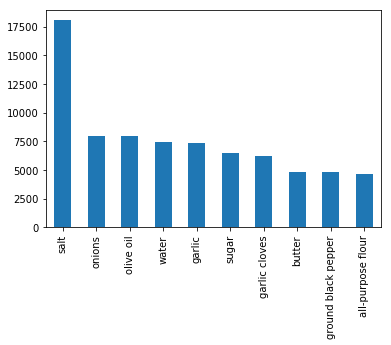

In [16]:
pd.Series(ingredients).value_counts()[:10].plot('bar')

* Salt is the most frequent ingredient, not surprising
* It insteresting that water isn't the second most frequent ingredient
* Maybe .. ingredient names need to be cleaned/grouped

### Least occuring ingredients

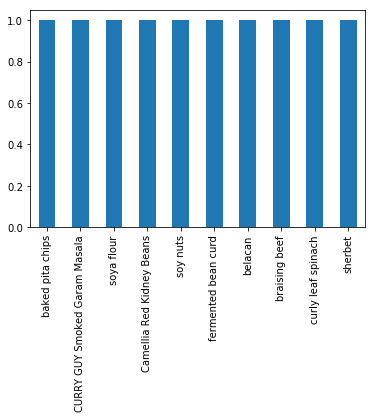

In [17]:
pd.Series(ingredients).value_counts()[-10:].plot('bar')

* Remove below threshold ingredients ?

### Total number of ingredients

In [18]:
len(set(ingredients))

6714

* There are 6714 different type of ingredients
* If we're going with the normal ADS route, we will have to build a ndarray of shape (39774, 6714). This will be a huge matrix

## Top ingredients per cuisine

In [19]:
cuisine_ingr.head()

,cuisine,ingredients
0,brazilian,"[ice cubes, club soda, white rum, lime, turbin..."
1,british,"[greek yogurt, lemon curd, confectioners sugar..."
2,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, ..."
3,chinese,"[low sodium soy sauce, fresh ginger, dry musta..."
4,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."


In [20]:
len(cuisine_ingr['ingredients'])

20

In [21]:
cuisine_ingr['ing_counts']=cuisine_ingr.ingredients.apply(lambda x :len(x))

In [22]:
cuisine_ingr['ing_unique_counts']= cuisine_ingr.ingredients.apply(lambda x :len(set(x)))

In [23]:
cuisine_ingr.sort_values("ing_unique_counts")

,cuisine,ingredients,ing_counts,ing_unique_counts
0,brazilian,"[ice cubes, club soda, white rum, lime, turbin...",4446,853
15,russian,"[water, grits, mozzarella cheese, salt, water,...",5000,872
10,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",6425,877
12,korean,"[jasmine rice, garlic, scallions, sugar, shiit...",9366,898
4,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",7550,947
14,moroccan,"[ground cloves, whole nutmegs, ground ginger, ...",10599,974
8,irish,"[cooking spray, salt, black pepper, yukon gold...",6203,999
19,vietnamese,"[soy sauce, vegetable oil, red bell pepper, ch...",10457,1108
1,british,"[greek yogurt, lemon curd, confectioners sugar...",7806,1166
6,greek,"[romaine lettuce, black olives, grape tomatoes...",11964,1198


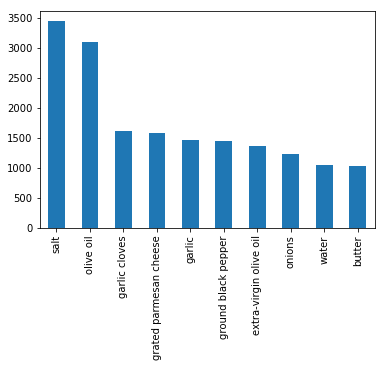

In [24]:
pd.Series(cuisine_ingr[cuisine_ingr.cuisine=="italian"]['ingredients'].values[0]).value_counts()[:10].plot('bar')

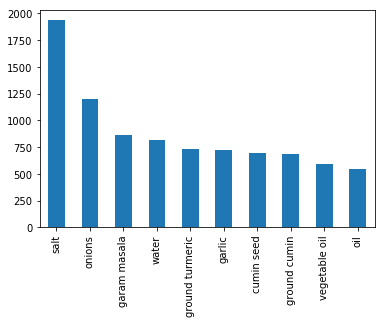

In [25]:
pd.Series(cuisine_ingr[cuisine_ingr.cuisine=="indian"]['ingredients'].values[0]).value_counts()[:10].plot('bar')

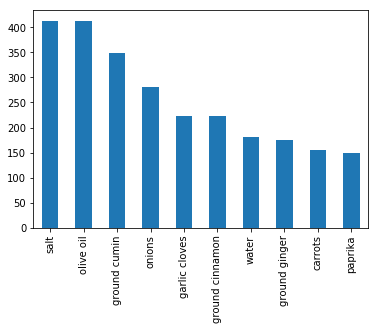

In [29]:
pd.Series(cuisine_ingr[cuisine_ingr.cuisine=="moroccan"]['ingredients'].values[0]).value_counts()[:10].plot('bar')

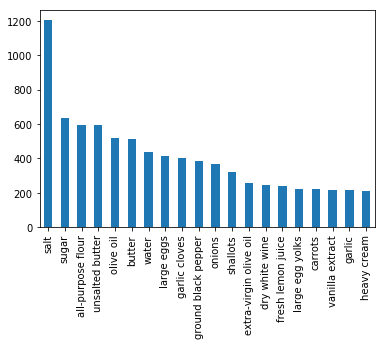

In [31]:
pd.Series(cuisine_ingr[cuisine_ingr.cuisine=="french"]['ingredients'].values[0]).value_counts()[:20].plot('bar')

In [46]:
cuisine_ingr.ingredients.apply(lambda x : set(x))

0     {fresh cilantro, corn tortillas, vegetable sto...
1     {fresh cilantro, pork, vegetable stock, coarse...
2     {ice cream salt, red kidney beans, bacon greas...
3     {Wish-Bone Light Italian Dressing, boneless ch...
4     {fresh cilantro, pork, meat, vegetable stock, ...
5     {tart apples, chuck steaks, light cream, dried...
6     {fresh cilantro, cheese spread, balsamic vinai...
7     {red kidney beans, mixed bell peppers, english...
8     {vegetable stock, meat, Angostura bitters, sou...
9     {red kidney beans, boneless chicken cutlet, li...
10    {fresh cilantro, dasheen, jamaican jerk, pork,...
11    {california avocado, tart apples, whole wheat ...
12    {fresh cilantro, corn tortillas, pork, meat, g...
13    {california avocado, red kidney beans, mixed b...
14    {fresh cilantro, vegetable stock, meat, black ...
15    {fresh cilantro, pork, meat, vegetable stock, ...
16    {red kidney beans, bacon grease, boneless chic...
17    {fresh cilantro, virgin olive oil, pork, m

# Data Preparation

In [5]:
data_df['ingredients'] = data_df['ingredients'].apply(lambda x: ','.join(x))

In [16]:
binary_ads = pd.get_dummies(data_df.set_index(['id', 'cuisine']). \
    ingredients.str.split(',\s*', expand=True).stack()
).groupby(level=['id', 'cuisine']).sum().astype(int)

In [17]:
binary_ads.head()

,,,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1 inch thick,1% low-fat buttermilk,1% low-fat chocolate milk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
id,cuisine,,,,,,,,,,,,,,,,,,,,,
0,spanish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mexican,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,french,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,italian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [18]:
binary_ads.reset_index(inplace=True)

In [22]:
y = binary_ads.pop('cuisine')

In [23]:
X = binary_ads.values

In [21]:
knn = KNeighborsClassifier(n_jobs=-1)

In [26]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
probs = knn.predict_proba(X)

In [32]:
knn.score(X, y)

0.36772766128626744